# Implementation of K-Means Clustering in Breast Cancer Dataset 

### OBJECTIVES 
1. Identification of  optimum K value.
2. Silhouette analysis.
3. Impact of normalization on the quality of clusters.
4. Class to cluster comparison with visual and numeric methods

### LOADING THE DATASET

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

##### In K means cluster algorithm we do a iterative approach for minimizing the within cluster sum of squares(SSE) which is also called Cluster Inertia.

In [3]:
# Create a DataFrame with features and target
df = pd.DataFrame(data=bc.data, columns=bc.feature_names)
# Display the DataFrame
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [5]:
df.shape

(569, 30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [8]:
target = bc.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Feature Selection

##### We can use correlation to extract the features which is strongly associated with the target column. To find it we can use a heatmap to find the correlation between the attributes.

<Axes: >

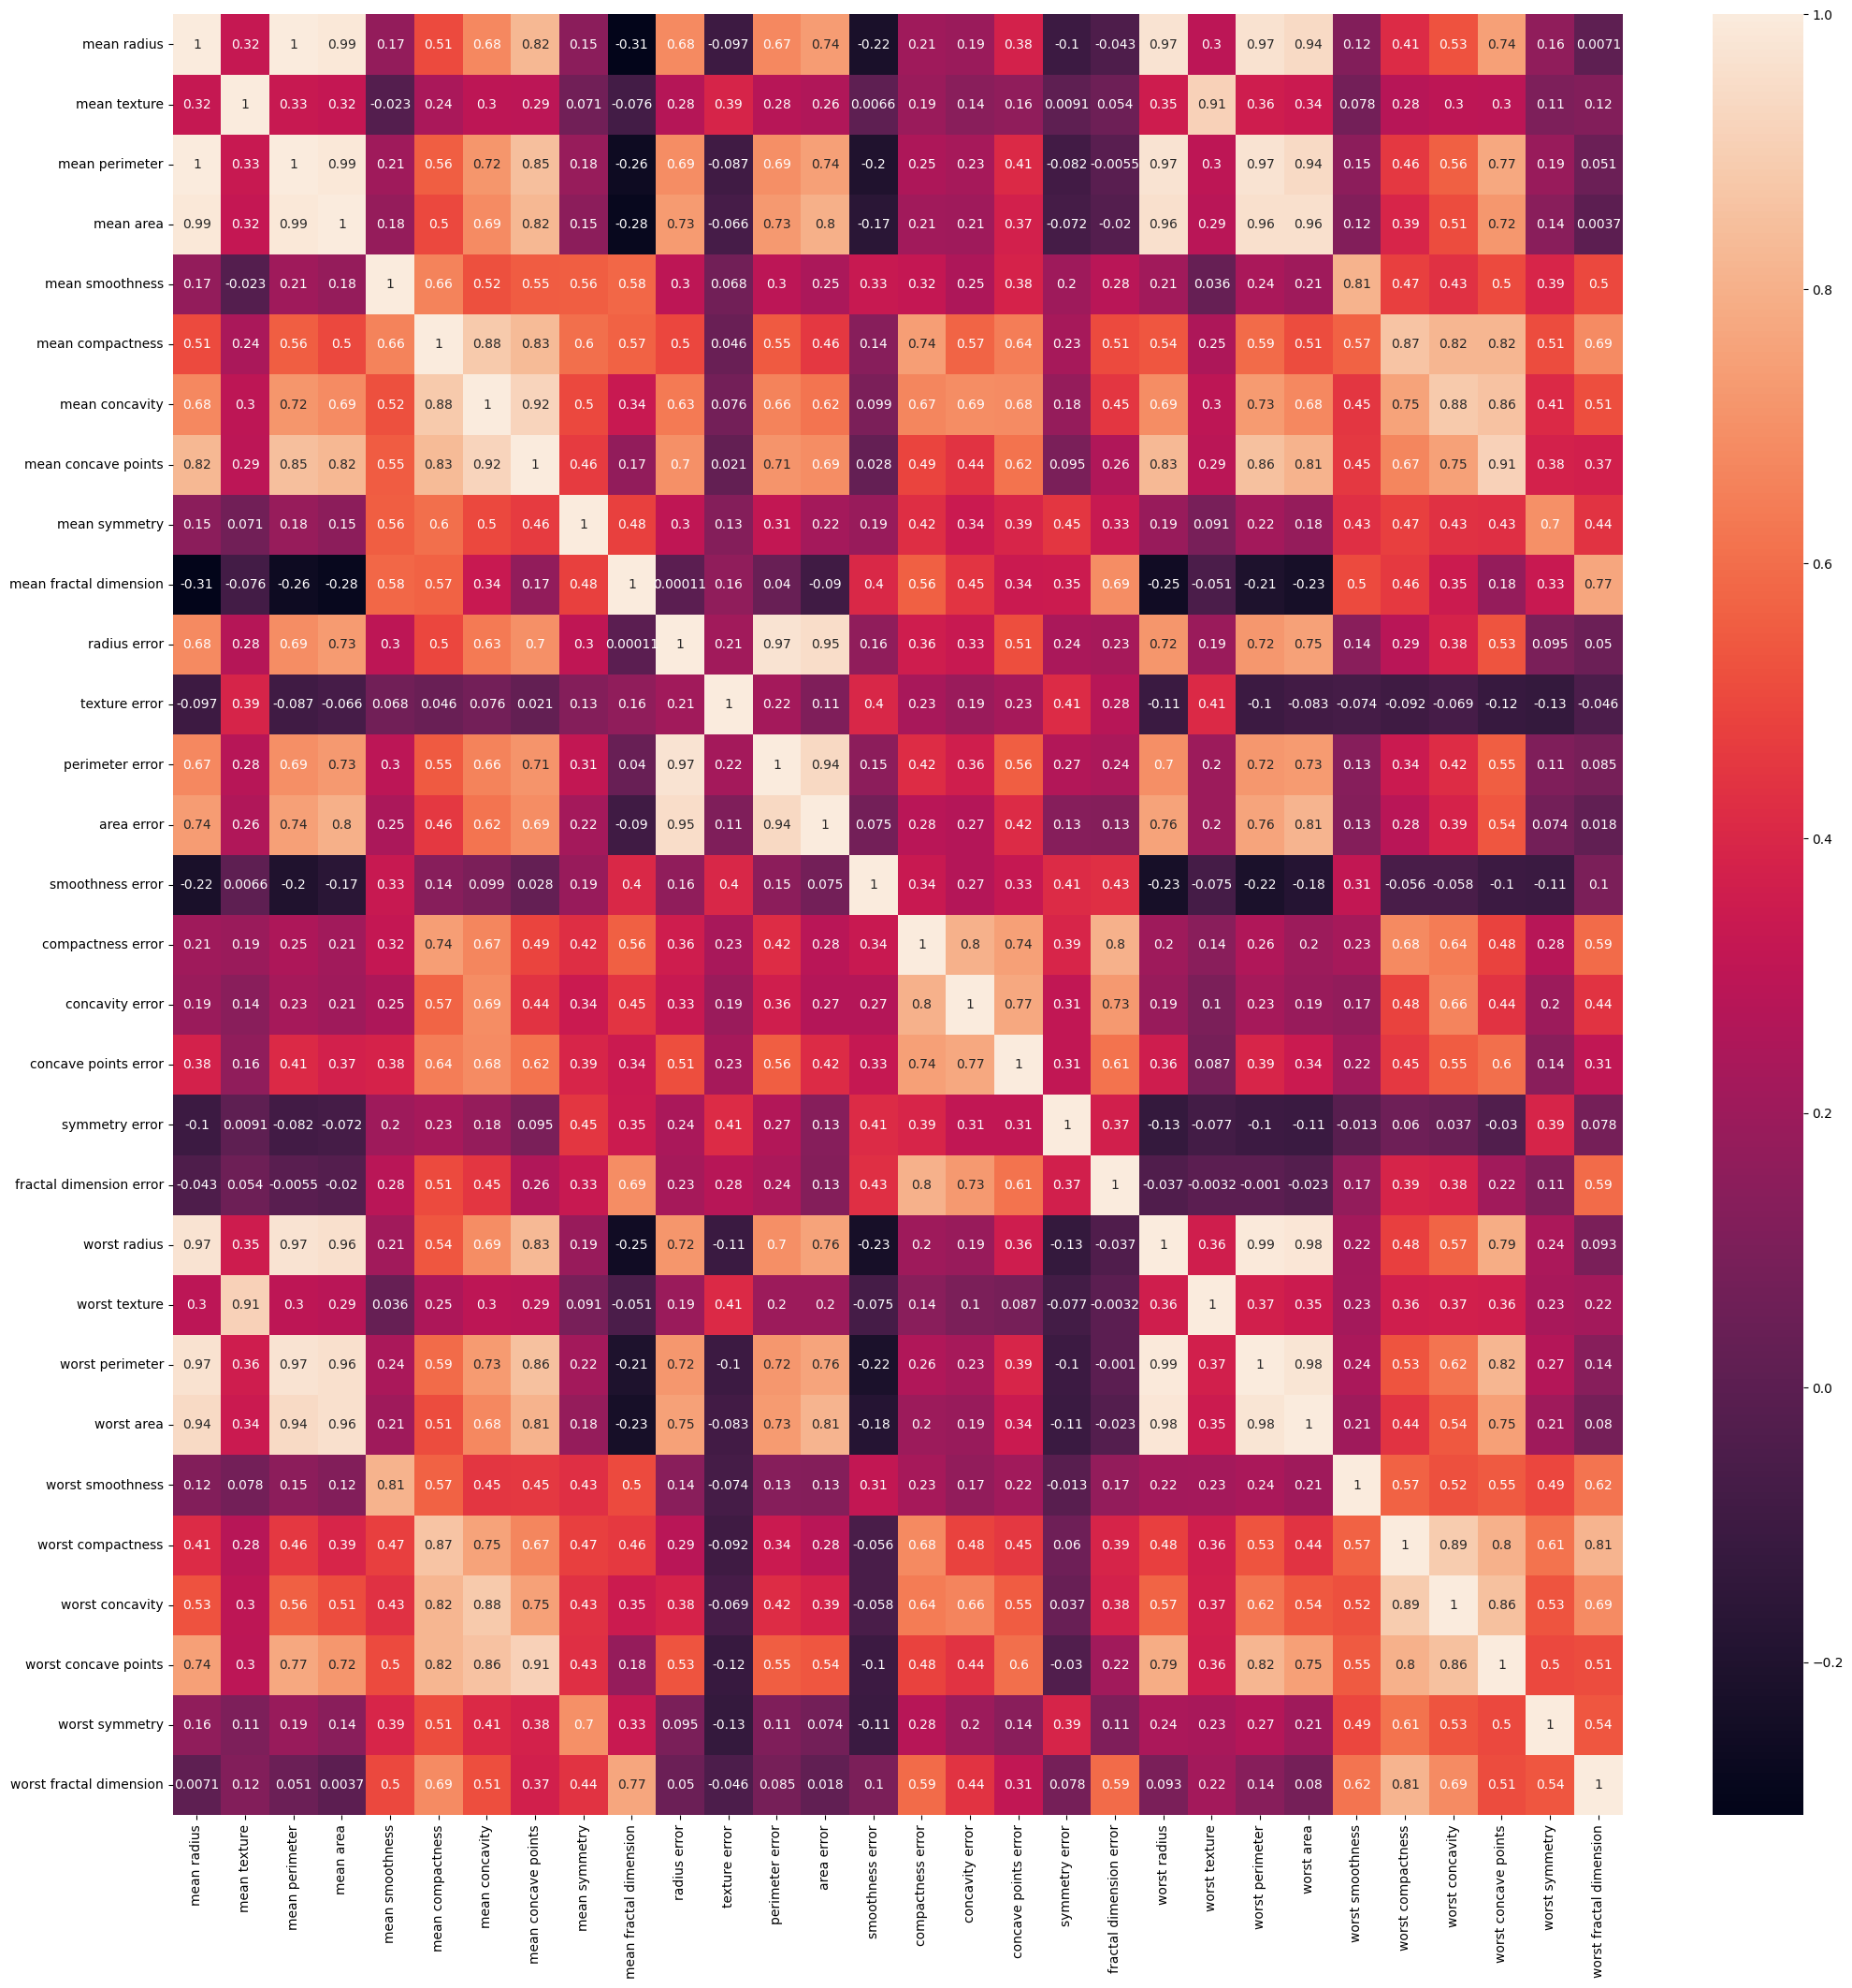

In [9]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot = True)

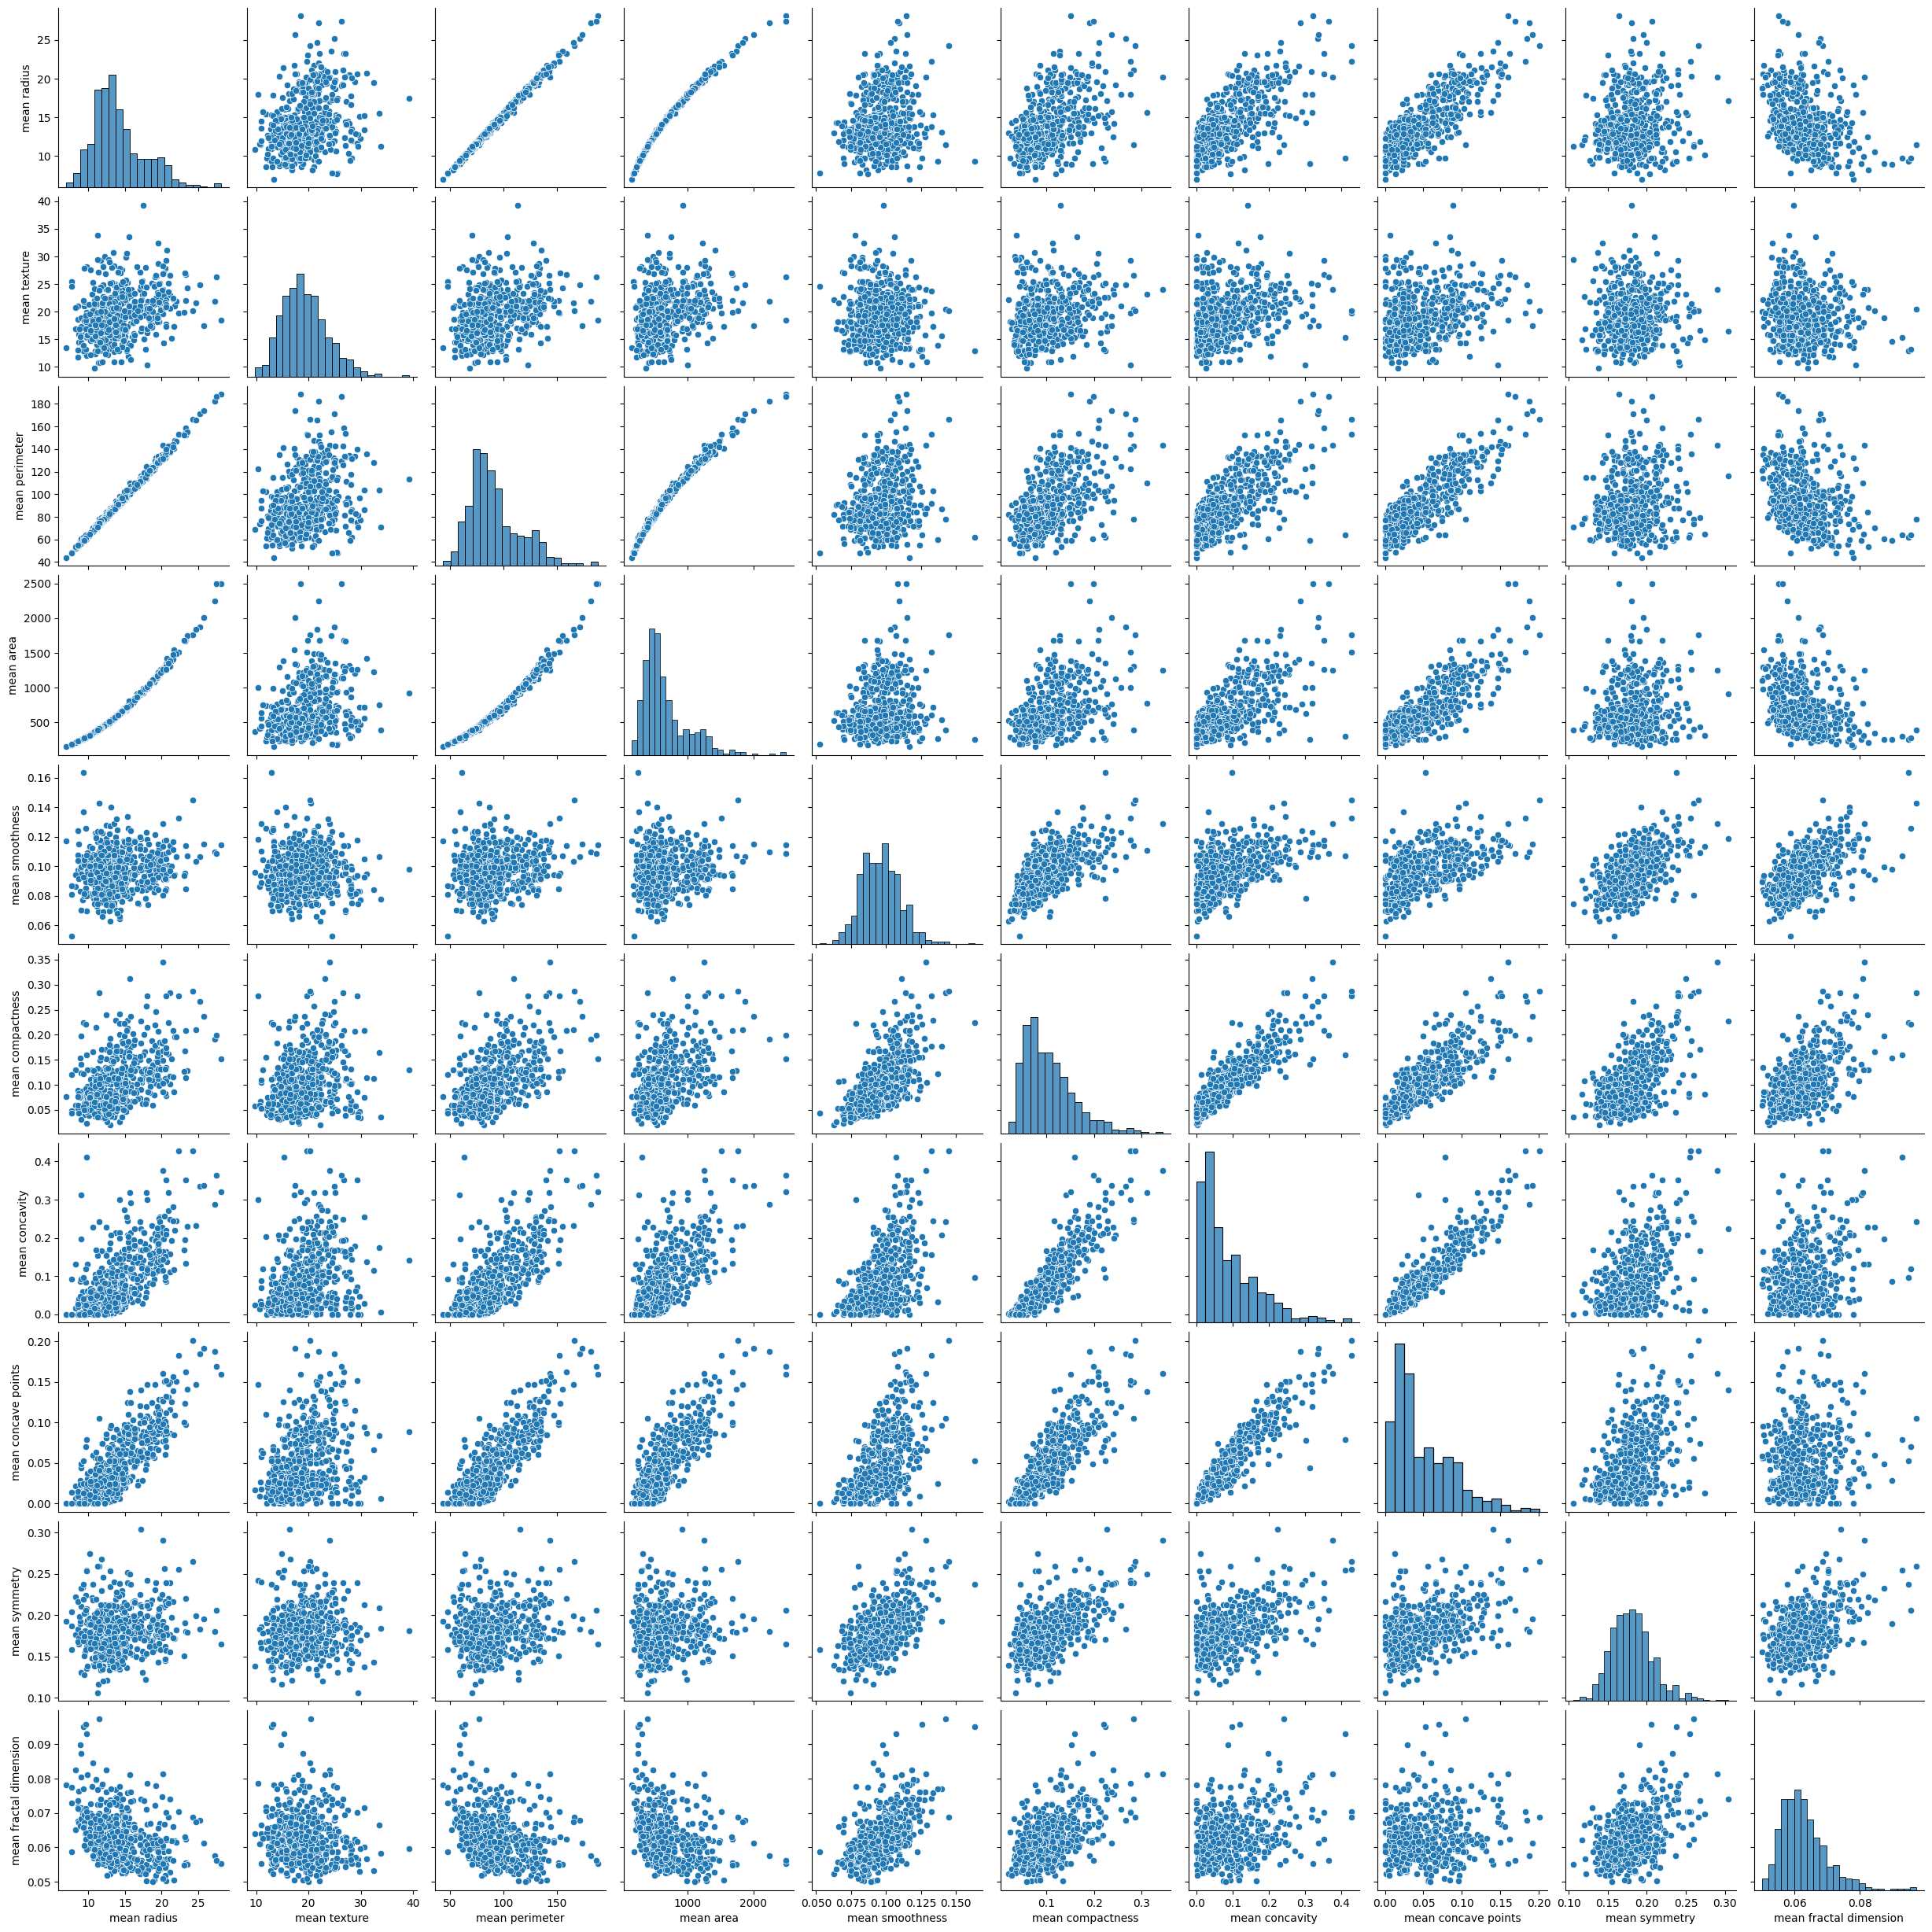

In [10]:
# Pairplot of mean columns
col = [ 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']
sns.pairplot(data=df[col])

- ##### Almost perfectly linear pattern between raduis, perimeter and area attributes of the mean column are hinting the presence of multicolinearity between these variables or attributes. Hence we retain just one of them Radius mean.
- ##### Another set of attrubutes that possibly imply multicolinearity are the concavity, concave points and compactness. We retain one which is compactness.
- ##### Considering the heatmap, we can also see high correlation between the mean and worst column. For instance radius mean has high correlation between radius worst column.

- **High correlation with the target variable** : Highly correlated features can help in enhancing the clusters. Hence we retain them.

- **High correlation with other features** : In the pairplot we can see linear relationship or high correlation between some features which is called as Multicollinearity. It indicates that they provide redundant or similar information. It can lead to overfitted model. Hence we drop such features.

- **Weak correlation with the target variable** : Dropping such variables will helps in simplifying the model and improve interpretability, especially if they do not contribute much to the prediction.

In [11]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [12]:
#dropping all the worst columns
cols = ['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']
df= df.drop(cols, axis = 1)
#dropping all the columns related with perimeter and area attributes.
col1 = ['mean perimeter',
       'perimeter error', 'area error',
       'mean area']
df = df.drop(col1, axis=1)
#dropping all the columns related with 'concavity and 'concave points' attributes
col2 = ['radius error', 'texture error',
       'smoothness error', 'compactness error', 'concavity error','mean concave points', 'mean concavity',
       'concave points error', 'symmetry error', 'fractal dimension error']
df = df.drop(col2, axis=1)
df.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension'],
      dtype='object')

<Axes: >

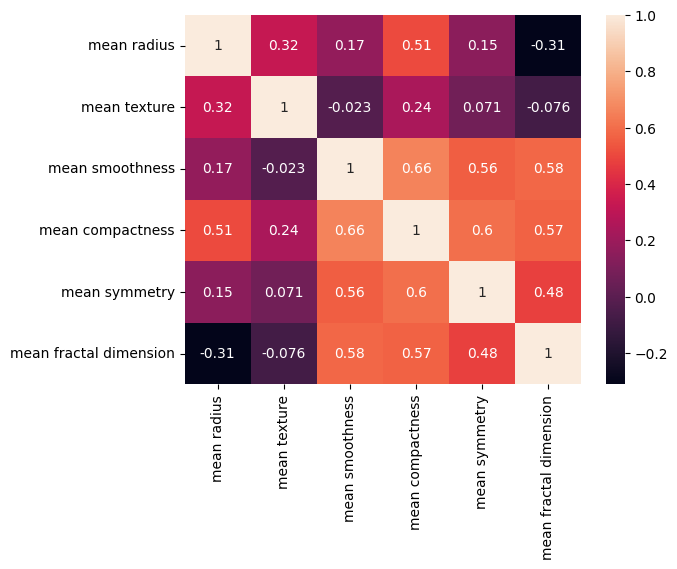

In [13]:
sns.heatmap(df.corr(), annot = True)

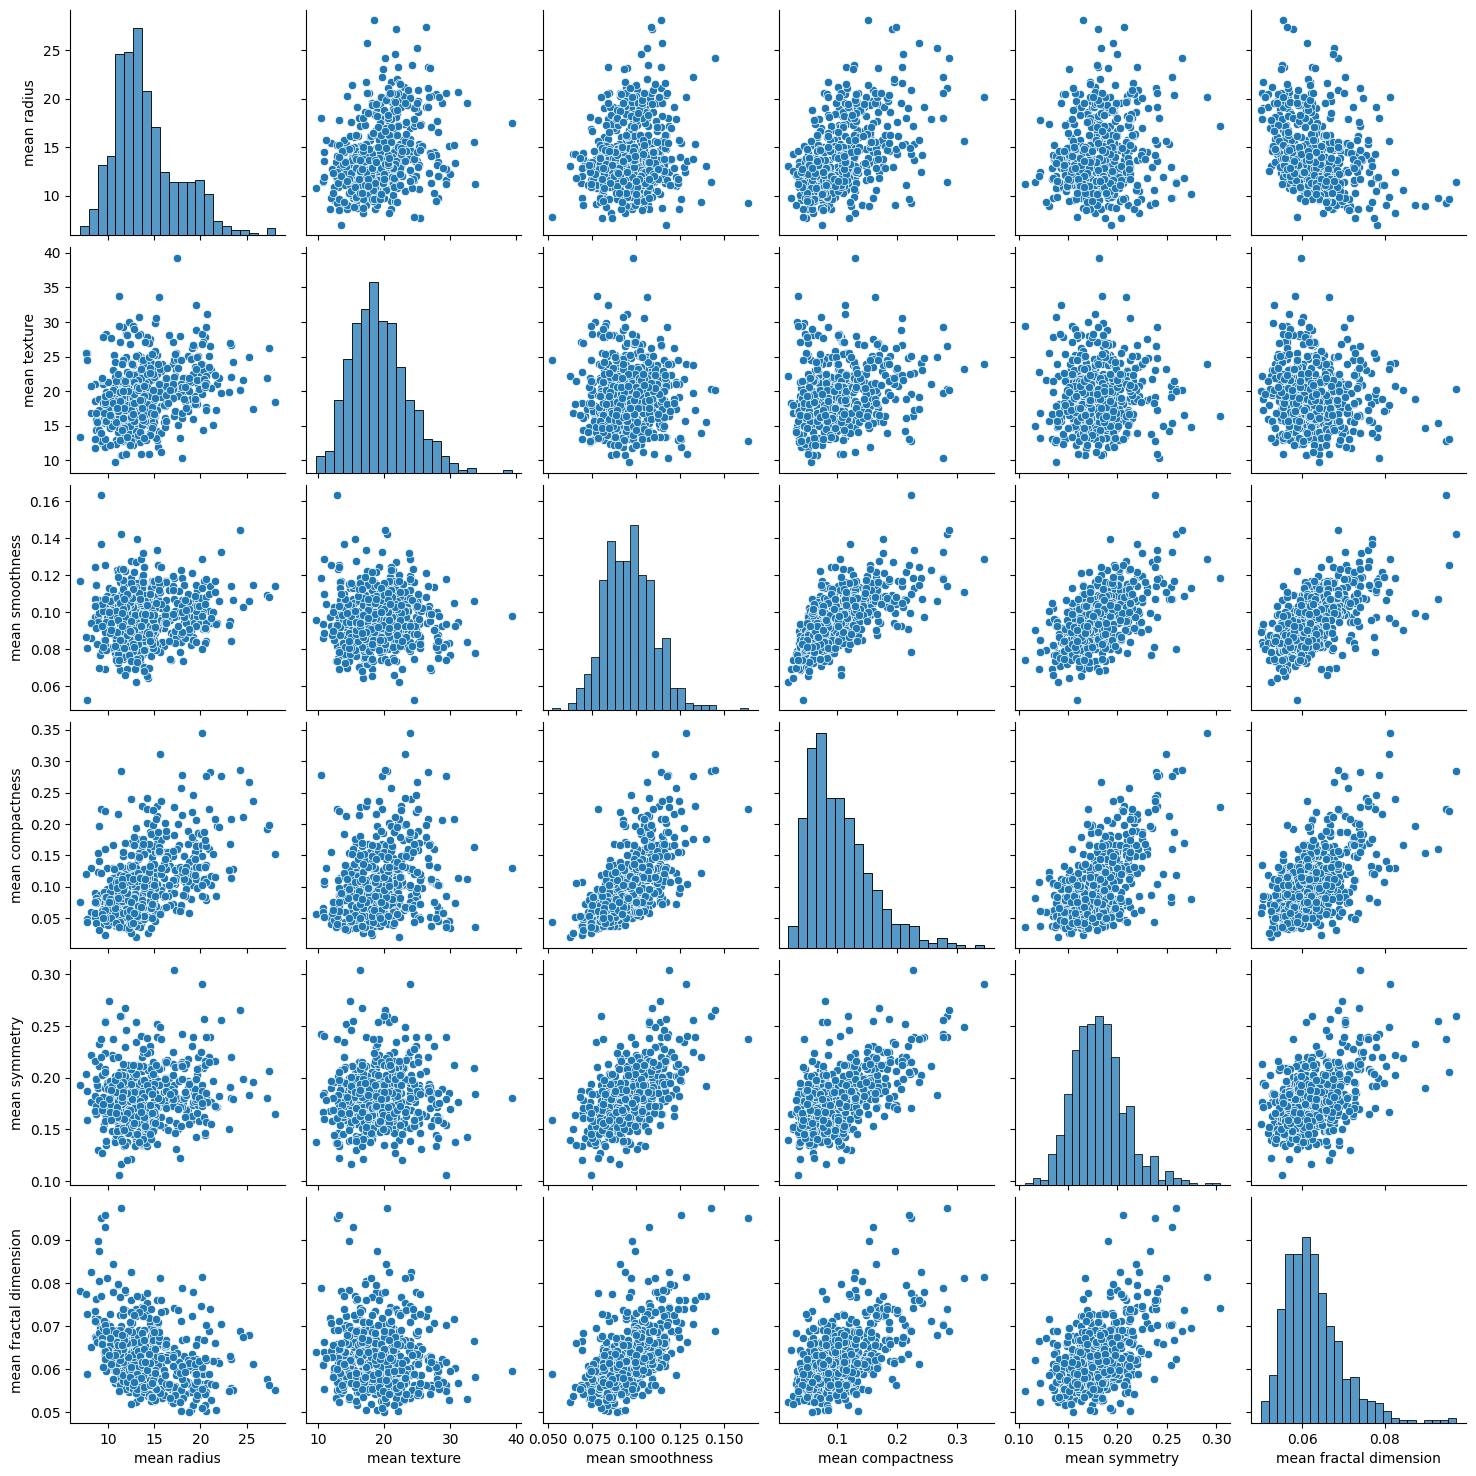

In [14]:
sns.pairplot(df)

In [15]:
df.head()

mean radius  mean texture  mean smoothness  mean compactness  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   mean symmetry  mean fractal dimension  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [16]:
X = df
y = target
print("The extracted data is as follows")
X.head()

The extracted data is as follows


mean radius  mean texture  mean smoothness  mean compactness  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   mean symmetry  mean fractal dimension  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [17]:
print("The actual target labels are as follows:")
y

The actual target labels are as follows:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### Plot of current distribution of datapoints based on the Mean Radius and Mean Compactness

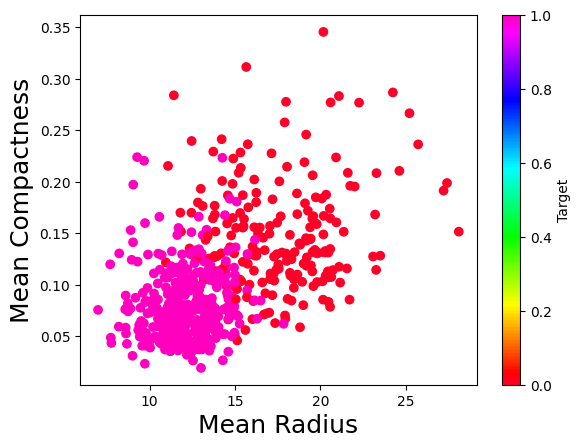

In [18]:
plt.scatter(X.iloc[:,0], X.iloc[:,3], c=y, cmap='gist_rainbow')
plt.xlabel('Mean Radius', fontsize=18)
plt.ylabel('Mean Compactness', fontsize=18)
plt.colorbar(label='Target')

### SELECTION OF NUMBER OF CLUSTERS

#### ELBOW METHOD

In [19]:
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)

  File "C:\Users\dijdo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


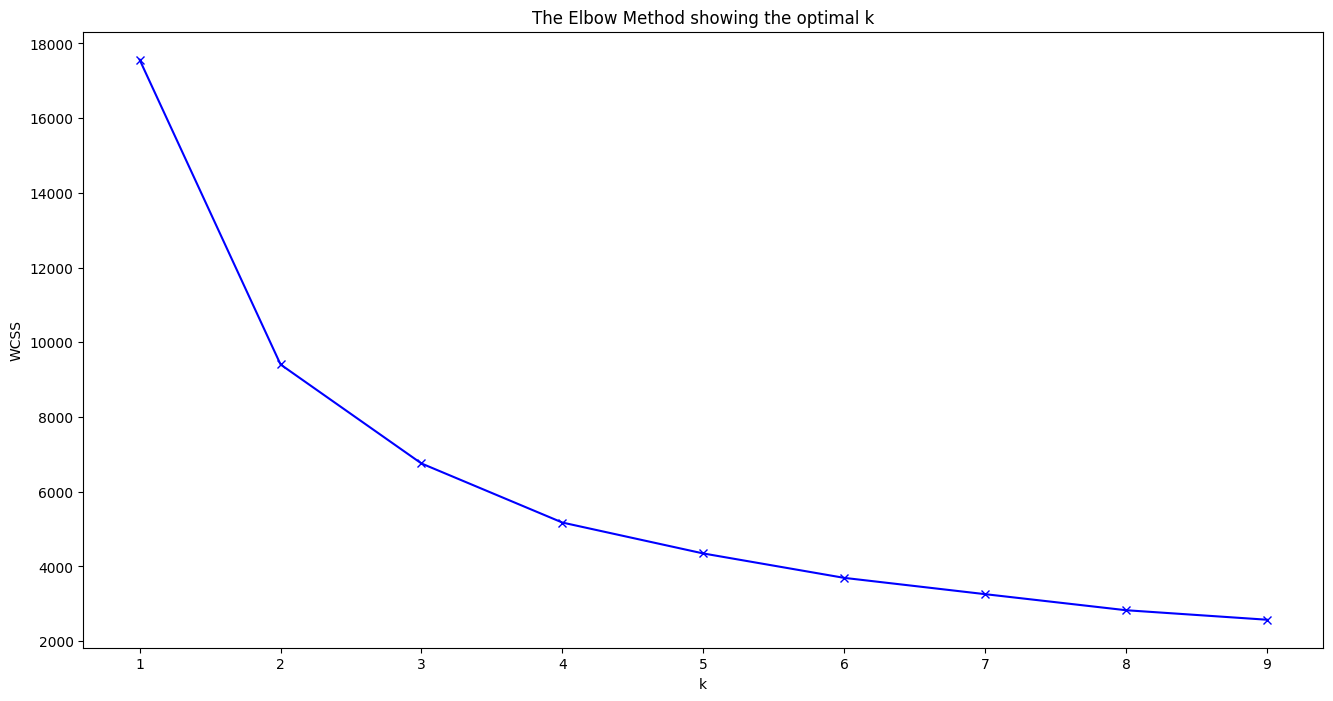

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Data Insights:**
- The within cluster sum of squares variation becomes so less after k = 2.
- Therefore, by elbow method the number of clusters will be 2.

### Silhouette Analysis

In [21]:
from sklearn.metrics import silhouette_score
n_clusters_range = range(2, 11)
silhouette_scores = []

for n_clusters in n_clusters_range:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the best number of clusters based on the highest silhouette score
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f"Best number of clusters: {best_n_clusters}")
print(f"Corresponding silhouette score: {best_silhouette_score}")

Best number of clusters: 2
Corresponding silhouette score: 0.4283732291893115


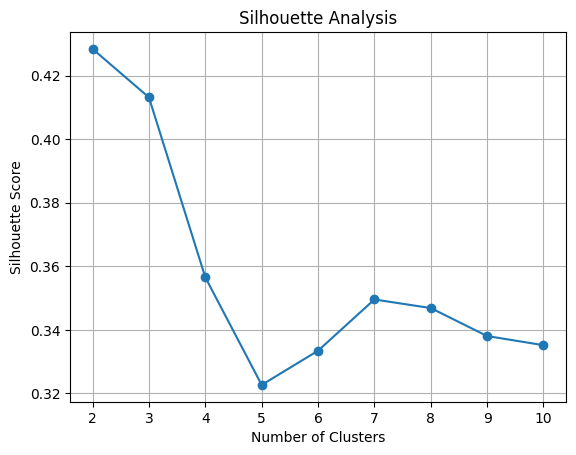

In [22]:
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

**Data Insights:**
- The Silhouette Score comes to be around 0.4 for k= 2, which indicates that clustering is proper.

### Clustering without Normalization

In [23]:
km = KMeans(n_clusters = 2,random_state=21)
km.fit(X)

KMeans(n_clusters=2, random_state=21)

In [24]:
centers = km.cluster_centers_
print("The centers before Normalization")
print(centers)

The centers before Normalization
[[16.65732751 23.14772926  0.09771131  0.12735087  0.18534978  0.06146118]
 [12.42323824 16.69111765  0.09545032  0.08884315  0.17834118  0.06369774]]


In [25]:
new_labels = km.labels_
print("The predicted labels are as following")
new_labels

The predicted labels are as following


array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

#### Plot of the actual and predicted target variables based on the columns Mean Radius and Mean Compactness

Text(0.5, 1.0, 'Predicted')

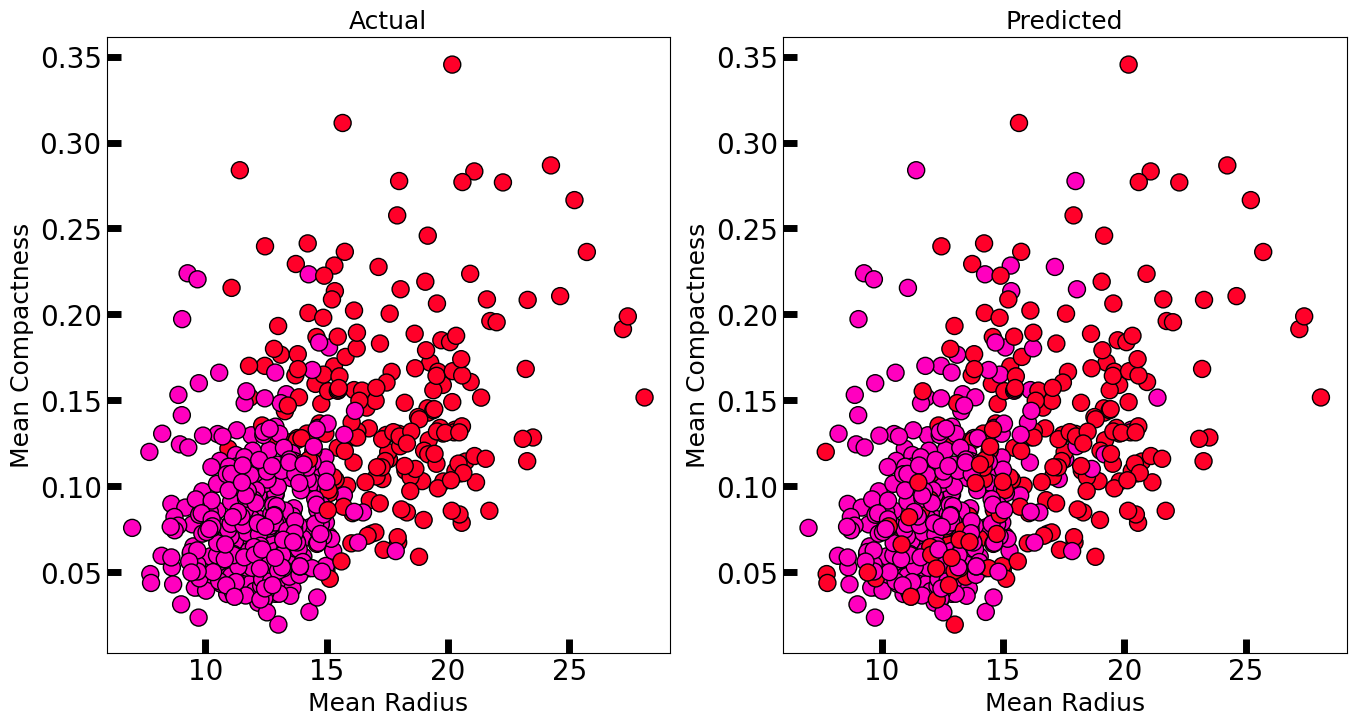

In [26]:
#Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 3], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 3], c=new_labels, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[0].set_xlabel('Mean Radius', fontsize=18)
axes[0].set_ylabel('Mean Compactness', fontsize=18)
axes[1].set_xlabel('Mean Radius', fontsize=18)
axes[1].set_ylabel('Mean Compactness', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [27]:
print("The cluster inertia before Normalization is ", km.inertia_)

The cluster inertia before Normalization is  9405.7090268333


### Clustering After Normalization

In [28]:
from sklearn.preprocessing import StandardScaler
scaler_Z = StandardScaler()
X_normalized_zscore = pd.DataFrame(scaler_Z.fit_transform(df), columns=df.columns)
X_normalized_zscore

mean radius  mean texture  mean smoothness  mean compactness  \
0       1.097064     -2.073335         1.568466          3.283515   
1       1.829821     -0.353632        -0.826962         -0.487072   
2       1.579888      0.456187         0.942210          1.052926   
3      -0.768909      0.253732         3.283553          3.402909   
4       1.750297     -1.151816         0.280372          0.539340   
..           ...           ...              ...               ...   
564     2.110995      0.721473         1.041842          0.219060   
565     1.704854      2.085134         0.102458         -0.017833   
566     0.702284      2.045574        -0.840484         -0.038680   
567     1.838341      2.336457         1.525767          3.272144   
568    -1.808401      1.221792        -3.112085         -1.150752   

     mean symmetry  mean fractal dimension  
0         2.217515                2.255747  
1         0.001392               -0.868652  
2         0.939685               -0.398008  
3         2.867383                4.910919  
4        -0.009560               -0.562450  
..             ...                     ...  
564      -0.312589               -0.931027  
565      -0.217664               -1.058611  
566      -0.809117               -0.895587  
567       2.137194                1.043695  
568      -0.820070               -0.561032  

[569 rows x 6 columns]

### Fitting the model after Normalization

In [29]:
km = KMeans(n_clusters = 2,random_state=21)
km.fit(X_normalized_zscore)

KMeans(n_clusters=2, random_state=21)

In [30]:
centers = km.cluster_centers_
print("The centers are\n")
print(centers)

The centers are

[[ 0.53206149  0.31989629  0.91966831  1.09264989  0.88298665  0.7499372 ]
 [-0.25633171 -0.1541167  -0.44306937 -0.52640685 -0.42539722 -0.36129787]]


In [31]:
print("The predicted labels are as following")
km.labels_

The predicted labels are as following


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

Text(0.5, 1.0, 'Predicted')

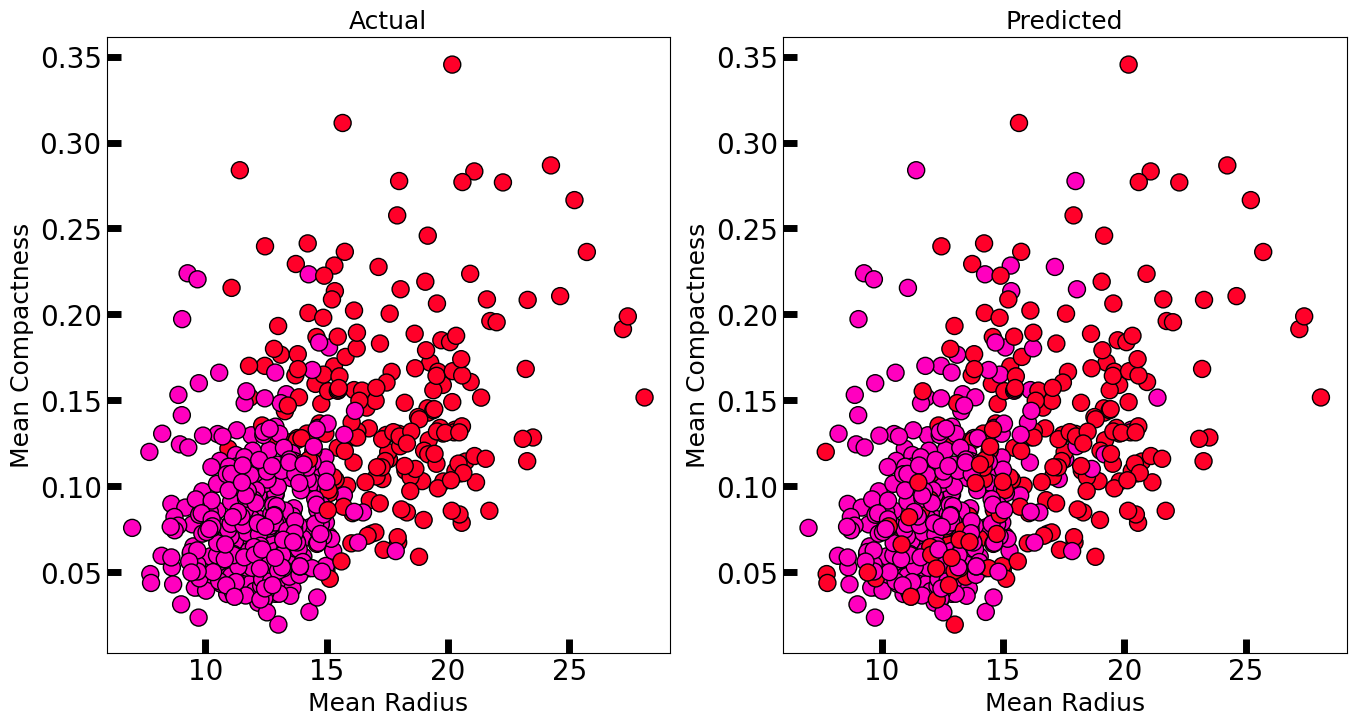

In [32]:
new_labels_n = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 3], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 3], c=new_labels, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[0].set_xlabel('Mean Radius', fontsize=18)
axes[0].set_ylabel('Mean Compactness', fontsize=18)
axes[1].set_xlabel('Mean Radius', fontsize=18)
axes[1].set_ylabel('Mean Compactness', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

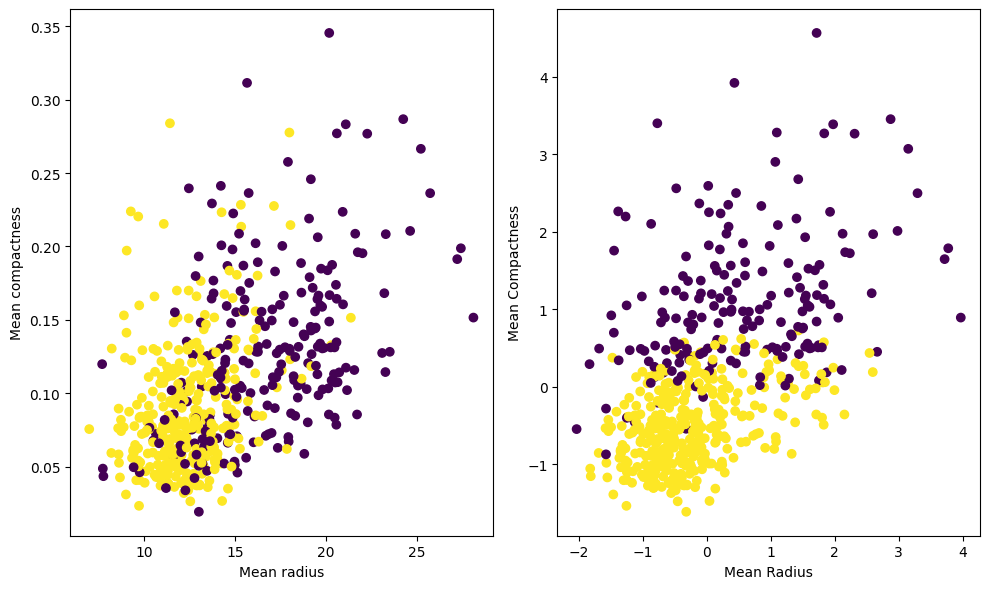

In [33]:
# plotting to show the clusters before and After Normalization
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.scatter(X['mean radius'], X['mean compactness'], c=new_labels)
plt.xlabel('Mean radius')
plt.ylabel('Mean compactness')

plt.subplot(1,2,2)
plt.scatter(X_normalized_zscore['mean radius'], X_normalized_zscore['mean compactness'], c=new_labels_n)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Compactness')

plt.tight_layout()


In [34]:
cluster_labels = km.fit_predict(X_normalized_zscore)
# Calculate silhouette score
silhouette_avg = silhouette_score(X_normalized_zscore, cluster_labels)
print(f"Number of clusters: {best_n_clusters}")
print(f"Corresponding silhouette score: {best_silhouette_score}")

Number of clusters: 2
Corresponding silhouette score: 0.4283732291893115


In [35]:
print("The inertia after normalization is:")
km.inertia_

The inertia after normalization is:


2381.315291900262

**Insights:**

Normalization after Z score using Standard Scalar gave a significant difference in the value of Inertia. Also the predicted values also seems to be matching with the target. To check that we can compare the class target to the labels obtained using various visual and numerical methods.

### Class to Cluster Comparison with Visual and Numeric Methods

In [36]:
print("The predicted labels are:")
new_labels_n

The predicted labels are:


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [37]:
print("The original target labels are")
y

The original target labels are


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [38]:
len(y)

569

In [39]:
len(new_labels_n)

569

In [40]:
Label_df = pd.DataFrame({'Predicted_Labels': new_labels_n, 'Actual_Labels': y})
Label_df.head()                    

Predicted_Labels  Actual_Labels
0                 0              0
1                 1              0
2                 0              0
3                 0              0
4                 0              0

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Label_df['Predicted_Labels'], Label_df['Actual_Labels'])
cm

array([[136,  49],
       [ 76, 308]], dtype=int64)

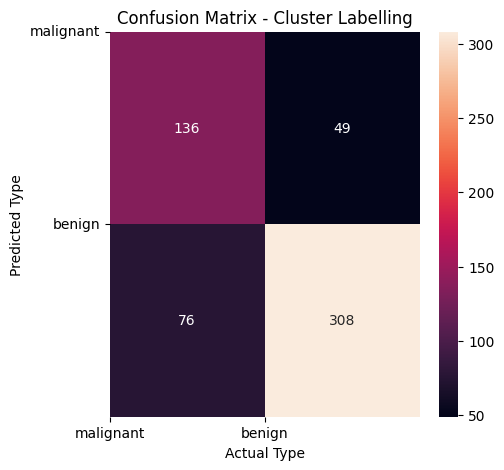

In [42]:

plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xticks(ticks =np.arange(len(bc.target_names)), labels = bc.target_names, rotation = 0)
plt.yticks(ticks =np.arange(len(bc.target_names)), labels = bc.target_names, rotation = 0)
plt.title("Confusion Matrix - Cluster Labelling")
plt.xlabel("Actual Type")
plt.ylabel("Predicted Type")
plt.show()

**True Positive** : 136

**False Positive**: 49

**True Negative**: 308

**False Negative**: 76

In [43]:
predicted = km.predict(X_normalized_zscore.iloc[12,].values.reshape(1, -1))
actual = y[12]
print("Actual Class: {}, Predicted class {}".format(actual, predicted))

Actual Class: 0, Predicted class [0]


We have considered a row from the data for predicting the cluster and the actual and predicted class matches. This implies that the classified cluster labels are in right order. There is no mismatch.